# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

In [ ]:
#The topic Hillary and I are exploring for our term project is identifying Food Deserts within the 9 counties of the Bay Area.
#Broadly, food deserts are regions with low access to healthy and affordable foods. Food deserts can be found in rural areas where grocery stores may be difficult to access, but can also occur in urban communities like the counties in the Bay Area. Here we will look at census tracts and determine if they are food deserts. Census tracts are regions within a country that are grouped together by the US Census.
#We are interested in analysing neighborhood characteristcs as well as accessibility to supermarkets through public transportation as well as the availability of a vehicle per household. 

#The datasets we will be using are USDA Food Access Network, US Census Data, Cal-Adapt, California State Data and (Transportation Data that we will put on ArcGIS). 

In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
fa = pd.read_csv('FoodAccess2019_Bay Area.csv')
fa

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,6001400100,California,Alameda County,1,2937,1314,0,2,0.07,0,...,634,2161,142,456,9,4,165,117,28,0
1,6001400200,California,Alameda County,1,1974,856,0,70,3.55,0,...,323,1659,33,147,0,4,131,151,59,0
2,6001400300,California,Alameda County,1,4865,2418,0,40,0.82,0,...,493,3468,518,423,5,17,434,399,423,38
3,6001400400,California,Alameda County,1,3703,1779,0,33,0.89,0,...,353,2628,456,278,6,14,321,332,157,115
4,6001400500,California,Alameda County,1,3517,1578,0,126,3.58,0,...,314,1905,955,209,5,27,416,340,188,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,6097154201,California,Sonoma County,1,3925,1417,0,31,0.79,1,...,476,2613,35,28,9,98,1142,1702,148,245
1576,6097154202,California,Sonoma County,1,5994,2284,0,80,1.33,0,...,1135,4888,18,82,3,87,916,1421,95,98
1577,6097154302,California,Sonoma County,0,3747,1785,0,16,0.43,0,...,704,3348,16,81,3,27,272,311,31,21
1578,6097154303,California,Sonoma County,0,1720,871,0,47,2.73,0,...,680,1583,16,17,0,12,92,159,20,34


In [67]:
selected_columns = fa[['CensusTract', 'County', 'LowIncomeTracts', 'MedianFamilyIncome', 'PovertyRate', 'lapop1', 'laseniors1', 'lahunv1', 'lapop10', 'TractLOWI', 'TractSNAP', 'TractHUNV']]
food_access = pd.DataFrame(selected_columns)
food_access

,CensusTract,County,LowIncomeTracts,MedianFamilyIncome,PovertyRate,lapop1,laseniors1,lahunv1,lapop10,TractLOWI,TractSNAP,TractHUNV
0,6001400100,Alameda County,0,220486.0,3.6,1711.0,361.0,17.0,NaN,312,0,28
1,6001400200,Alameda County,0,233625.0,6.5,NaN,NaN,NaN,NaN,230,0,59
2,6001400300,Alameda County,0,166875.0,5.3,NaN,NaN,NaN,NaN,526,38,423
3,6001400400,Alameda County,0,141250.0,11.3,NaN,NaN,NaN,NaN,802,115,157
4,6001400500,Alameda County,0,134583.0,11.9,NaN,NaN,NaN,NaN,809,51,188
...,...,...,...,...,...,...,...,...,...,...,...,...
1575,6097154201,Sonoma County,1,72949.0,11.6,551.0,81.0,39.0,NaN,1892,245,148
1576,6097154202,Sonoma County,0,89028.0,8.1,449.0,114.0,9.0,1.0,1185,98,95
1577,6097154302,Sonoma County,0,122174.0,12.4,3747.0,704.0,39.0,887.0,780,21,31
1578,6097154303,Sonoma County,0,78333.0,14.5,1649.0,643.0,20.0,455.0,363,34,20


In [68]:
low = food_access['MedianFamilyIncome'].dropna().quantile(.01)
print(low)

34211.85


In [69]:
high = food_access['MedianFamilyIncome'].dropna().quantile(.99)
print(high)

250001.0


In [70]:
low = food_access['PovertyRate'].dropna().quantile(.01)
print(low)

0.8


In [71]:
high = food_access['PovertyRate'].dropna().quantile(.99)
print(high)

37.6


In [72]:
Q1 = food_access[['MedianFamilyIncome', 'PovertyRate']].quantile(0.25)
Q3 = food_access[['MedianFamilyIncome', 'PovertyRate']].quantile(0.75)
IQR = Q3 - Q1

new_fa = food_access[~((food_access[['MedianFamilyIncome', 'PovertyRate']] < (Q1 - 1.5 * IQR)) | (food_access[['MedianFamilyIncome', 'PovertyRate']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [73]:
new_fa

,CensusTract,County,LowIncomeTracts,MedianFamilyIncome,PovertyRate,lapop1,laseniors1,lahunv1,lapop10,TractLOWI,TractSNAP,TractHUNV
0,6001400100,Alameda County,0,220486.0,3.6,1711.0,361.0,17.0,NaN,312,0,28
1,6001400200,Alameda County,0,233625.0,6.5,NaN,NaN,NaN,NaN,230,0,59
2,6001400300,Alameda County,0,166875.0,5.3,NaN,NaN,NaN,NaN,526,38,423
3,6001400400,Alameda County,0,141250.0,11.3,NaN,NaN,NaN,NaN,802,115,157
4,6001400500,Alameda County,0,134583.0,11.9,NaN,NaN,NaN,NaN,809,51,188
...,...,...,...,...,...,...,...,...,...,...,...,...
1575,6097154201,Sonoma County,1,72949.0,11.6,551.0,81.0,39.0,NaN,1892,245,148
1576,6097154202,Sonoma County,0,89028.0,8.1,449.0,114.0,9.0,1.0,1185,98,95
1577,6097154302,Sonoma County,0,122174.0,12.4,3747.0,704.0,39.0,887.0,780,21,31
1578,6097154303,Sonoma County,0,78333.0,14.5,1649.0,643.0,20.0,455.0,363,34,20


<Axes: xlabel='County'>

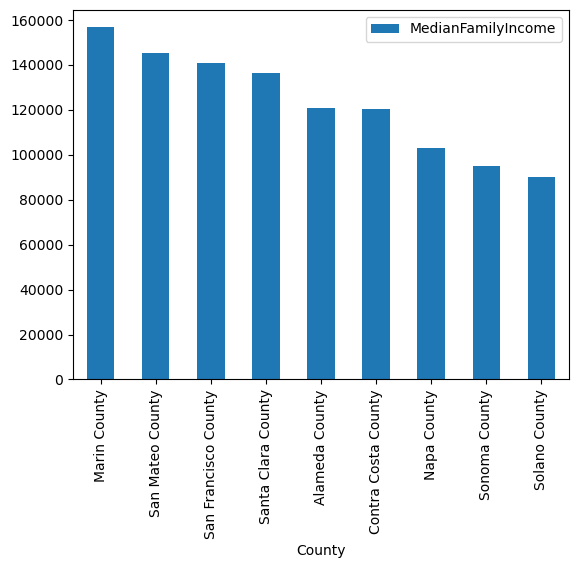

In [74]:
county_mfi = new_fa.groupby(
    new_fa['County'])[['MedianFamilyIncome']].mean().sort_values(by='MedianFamilyIncome', ascending=False)
county_mfi.plot(kind='bar')

<Axes: xlabel='County'>

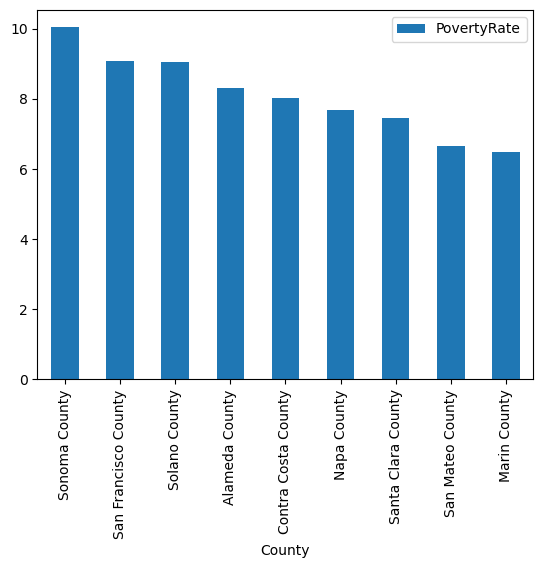

In [75]:
county_poverty = new_fa.groupby(
    new_fa['County'])[['PovertyRate']].mean().sort_values(by='PovertyRate', ascending=False)
county_poverty.plot(kind='bar')

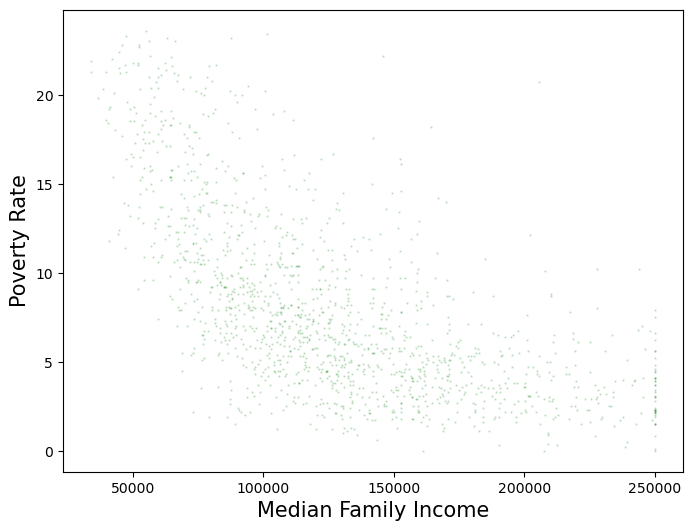

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))
foo = ax.scatter(new_fa['MedianFamilyIncome'], new_fa['PovertyRate'], c='g', alpha=0.2, s=0.4)
ax.set_xlabel("Median Family Income", fontsize=15)
_ = ax.set_ylabel('Poverty Rate', fontsize=15)

<Axes: xlabel='TractSNAP', ylabel='Density'>

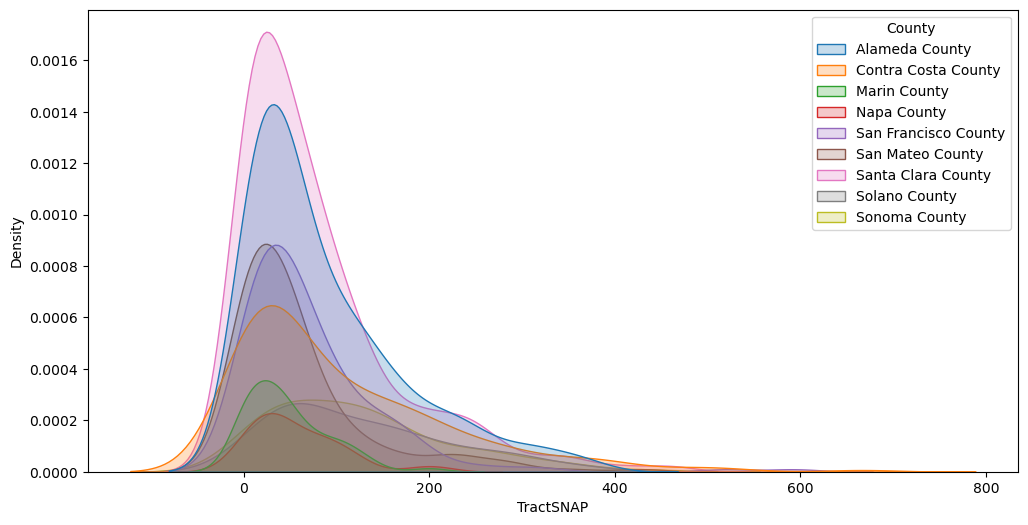

In [83]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=new_fa, x="TractSNAP", hue='County', fill=True, ax=ax)

In [ ]:
#We see that Sonoma County has the highest Poverty rate of close to 10%
#Marin County has the highest Median Family Income compared to the other 8 Bay Area counties
#From the graphs above we can see that the Average Median Income for the Bay Area counties falls between $100,000 and $150,000 but the poverty rates per tract for this category cluster between 5-10%.
#We also see that Santa Clara County has the most density of Housing units recieving SNAP benefits per tract

In [84]:
import json
import requests
import pprint
pp = pprint.PrettyPrinter()

In [ ]:
#For this exercise, I am not using an API so shall stop by office hours and speak with you. 

In [90]:
#**Draft Research Question**
#What is the relationship of food deserts with respect to access to transportation facilities in the Bay Area 